## Ejercicio
Implementar una función que reciba una lista y determine cuántos elementos hay repetidos.

Ejemplo:
Dada la lista (5,2,3,1,5,2,4,4,4) la respuesta debe ser 3 (se repiten los números 5, 2 y 4).
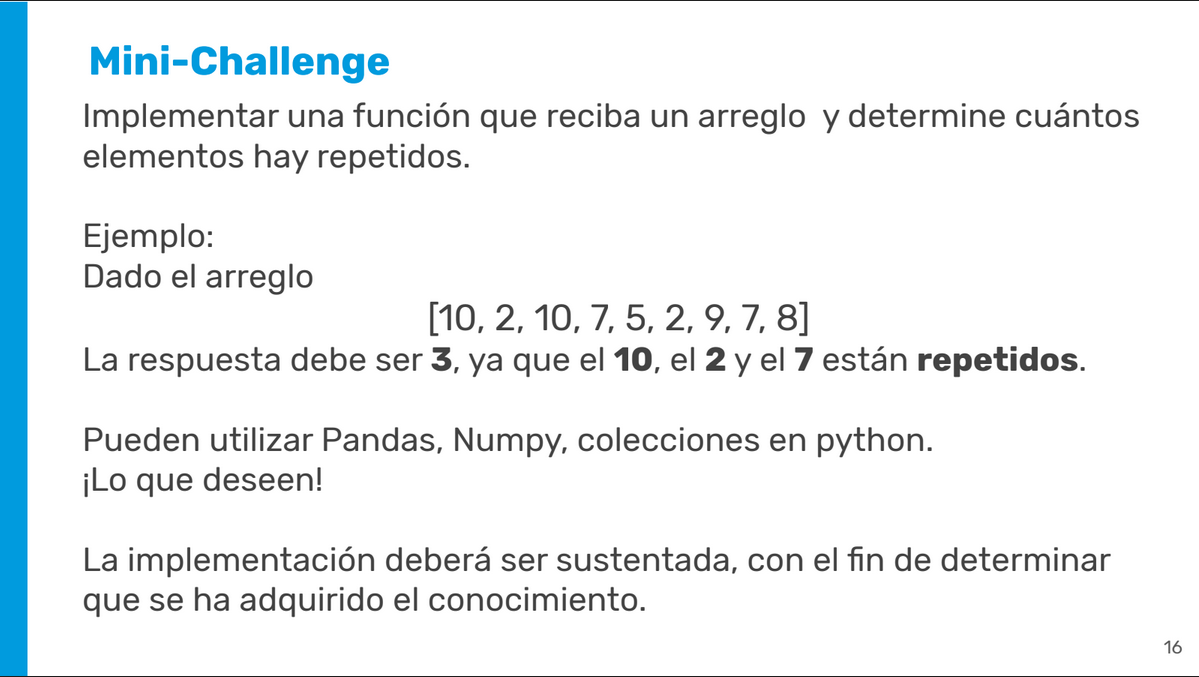

Realizaré tres funciones, una sin utilizar librerías externas, y las demás utilizando la librería Pandas y otra con la librería Numpy, luego compararé la velocidad de ejecución de cada una y finalmente seleccionaré la que sea más rápida.

### Sin librerías

In [1]:
def detectar_repetidos (array):
    cuenta = 0 # variable que contiene la cantidad de nros repetidos
    while array: # itero mientras el array contenga números
        item = array[0]
        array.pop(0) # guardo el primer item en una variable y luego lo elimino del array
        if item in array: # si hay un nro en el array igual a "item", incremento la cuenta y borro el numero del array
            cuenta += 1
            array.pop(array.index(item))
        while item in array: # elimino todos los numeros iguales a "item" que puedan quedar en el array
            array.pop(array.index(item))
    return cuenta

In [2]:
%%time
array = [10,100,10,7,5,2,9,7,9,9]
detectar_repetidos(array)

Wall time: 0 ns


3

### Con Pandas

In [3]:
import pandas as pd

In [4]:
def detectar_repetidos_pd (array): # creo la función
    array_2 = pd.Series(data=array, copy=True) # Convierto el array en un pandas Series
    return (array_2.value_counts() > 1).sum() 

# Values_counts() para contar la cantidad de apariciones de cada valor, luego con el condicional '>1' (valor repetido) genero 
# una Serie de booleanos True/False, que sum() interpreta como unos y ceros, obteniendo así la cantidad de repetidos.

In [5]:
%%time
array = [10,100,10,7,5,2,9,7,8]
detectar_repetidos_pd(array)

Wall time: 56.2 ms


2

### Con Numpy

In [6]:
import numpy as np

In [7]:
def detectar_repetidos_np (array): # creo la función
    array_2 = np.array(array) # Convierto el array en un numpy array
    return ((np.unique(array_2, return_counts=True))[1] > 1).sum() 

# 'unique' retorna dos arrays, uno con los valores unicos que integran al array original y otro con la cantidad de apariciones de cada uno 
# de esos valores (en las posiciones 0 y 1, respectivamente). Tomo el segundo array, genero booleanos de la condicion (idem funcion anterior) y los sumo con sum()

In [8]:
%%time
array = [10,5,10,8,5,2,9,7,8]
detectar_repetidos_np(array)

Wall time: 1.93 ms


3

## Pruebas de velocidad

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore') # time.clock() deprecado

# crea el array con valores repetidos
def array_creator(N):
    array = []
    i = 0
    while i < N:
        array.append(i)
        i += 1
    i = 0
    while i < int(N/6):
        array.append(i)
        i += 1
    return array

# recibe un array de funciones a cronometrar y devuelve un array de los tiempos y de los tamaños evaluados
def calcular_tiempos(n, N, paso, funciones):
    i = 0
    tiempos = []
    while i < len(funciones):
        tiempos.append([])
        i+=1
    size = []
    while n < N:
        i = 0
        array = array_creator(n)
        while i < len(funciones):
            start_time = time.clock()
            aux = funciones[i](array)
            tiempos[i].append(time.clock() - start_time)
            i += 1
        size.append(n+int(n/6)) # n+int(n/6) se debe al tamaño real que se asigna en la funcion 'array_creator'
        n = n + paso
    return tiempos, size

En una primera instancia recolecto datos del tiempo de ejecución de cada función, con arrays desde un largo inicial de 5 hasta 200, aumentando 5 en cada iteración. 

Luego repito pero con arrays desde un largo inicial de 200 hasta 3000, aumentando 200 en cada iteración. 

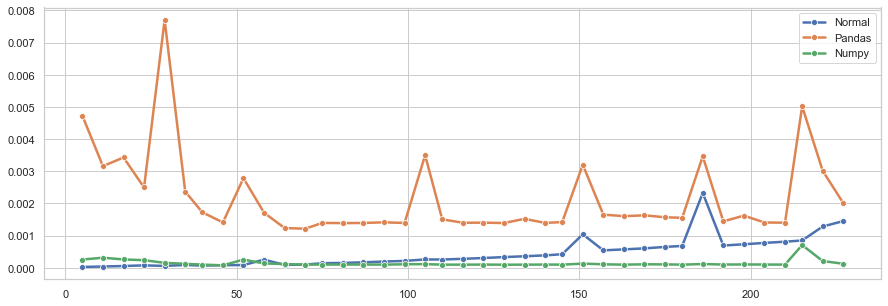

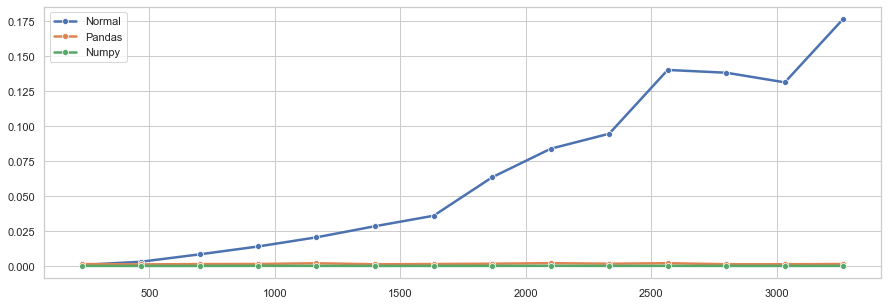

In [10]:
funciones=[detectar_repetidos, detectar_repetidos_pd, detectar_repetidos_np]

n = [5,200]
N = [200,3000]
paso = [5,200]

i = 0
while i < (len(n)):
    
    tiempos, size = calcular_tiempos(n[i], N[i], paso[i], funciones)

    plt.figure(figsize = (15,5))
    sns.set_theme(style="whitegrid")
    sns.lineplot(x = size, y = tiempos[0], palette="tab10", linewidth=2.5, label="Normal", marker="o")
    sns.lineplot(x = size, y = tiempos[1], palette="tab10", linewidth=2.5, label="Pandas", marker="o")
    sns.lineplot(x = size, y = tiempos[2], palette="tab10", linewidth=2.5, label="Numpy",  marker="o")

    plt.show()
    
    i += 1

Se observa que la función que no utiliza librerías ("Normal" en el gráfico) tiene un desempeño mejor que las otras dos para arrays de longitud menor a 70, aproximadamente. Para longitudes pequeñas, pandas es significativamente más lento pero a medida que aumenta la longitud, comienza a asemejarse a la velocidad de Numpy (la que presenta menor tiempo de ejecución), mientras que la función sin librerías comienza a presentar una pendiente positiva mucho más acelerada que las otras dos.  

Ahora focalizo en las funciones que utilizan Pandas y Numpy, con el fin de poder evaluarlas mejor.

Recolecto datos del tiempo de ejecución de cada función, con arrays desde un largo inicial de 20mil hasta 2mill, aumentando 20mil en cada iteración. 

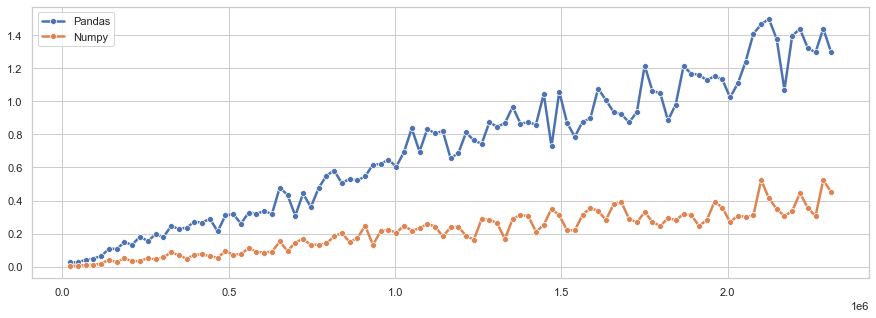

<AxesSubplot:>

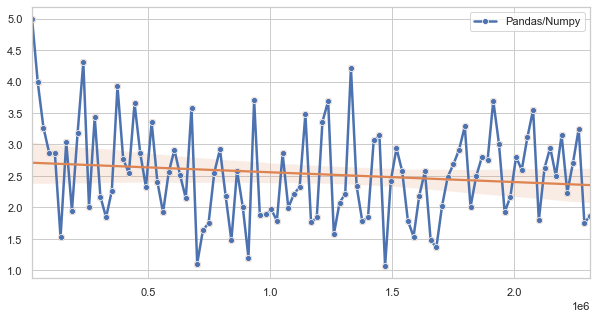

In [11]:
funciones=[detectar_repetidos_pd, detectar_repetidos_np]

n = [20000]
N = [2000000]
paso = [20000]

i = 0
while i < (len(n)):
    
    tiempos, size = calcular_tiempos(n[i], N[i], paso[i], funciones)

    plt.figure(figsize = (15,5))
    sns.set_theme(style="whitegrid")
    sns.lineplot(x = size, y = tiempos[0], palette="tab10", linewidth=2.5, label="Pandas", marker="o")
    sns.lineplot(x = size, y = tiempos[1], palette="tab10", linewidth=2.5, label="Numpy",  marker="o")

    plt.show()
    
    i += 1
    
# Cuál es la diferencia en proporción?

plt.figure(figsize = (10,5))
sns.set_theme(style="whitegrid")
sns.lineplot(x = size, y = ((np.array(tiempos[0])/np.array(tiempos[1]))-1), palette="tab10", linewidth=2.5, label="Pandas/Numpy", marker="o")
sns.regplot(x = size, y = ((np.array(tiempos[0])/np.array(tiempos[1]))-1))

En el primer gráfico se evalua el tiempo de ejecución respecto de la longitud del array. En el segundo, la diferencia en proporción del tiempo de ejecución de ambas funciones, respecto de la longitud del array.

Se observa que a medida que el tamaño del array aumenta, la diferencia nominal de tiempo entre ambas funciones también. A su vez, el tiempo de ejecución de numpy pareciera ser más estable.

Pareciera que la diferencia en proporción tiende a descender. Aunque se requieren más datos y repeticiones para determinar una relación más certera, indicaría que estarían infinitamente alejados pero con una relación proporcional que tendería a 1.

In [13]:
mediana = np.median(((np.array(tiempos[0])/np.array(tiempos[1]))-1))
mu = ((np.array(tiempos[0])/np.array(tiempos[1]))-1).mean()
std = ((np.array(tiempos[0])/np.array(tiempos[1]))-1).std()
print('Media: '+ str(round(mu, 2)) + '\nDesvío std: ' + str(round(std, 2))+ '\nMediana: ' + str(round(mediana, 2)))

Media: 2.53
Desvío std: 0.75
Mediana: 2.5


Para valores más precisos se deberían recabar más datos y hacer una gestión de outliers (ya que en los tiempos influyen variables externas a las librerías, generando ruido) pero como la diferencia de tiempo ya es clara, aumentar el nivel de precisión se escapa de los objetivos del ejercicio.

Queda verificar la posibilidad de aumentar la velocidad de la función con Numpy al eliminar el paso de guardar el np.array en una variable. En el siguente scrip se realiza el test.

Recolecto datos del tiempo de ejecución de cada función, con arrays desde un largo inicial de 20mil hasta 2mill, aumentando 20mil en cada iteración.

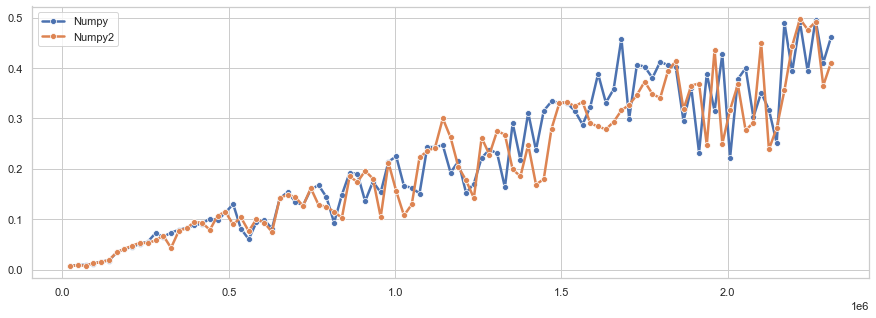

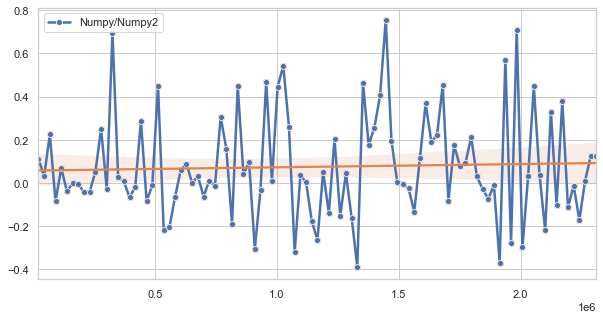

In [15]:
def detectar_repetidos_np_2 (array):
    return ((np.unique(np.array(array), return_counts=True))[1] > 1).sum()

funciones=[detectar_repetidos_np, detectar_repetidos_np_2]

n = [20000]
N = [2000000]
paso = [20000]

i = 0
while i < (len(n)):
    
    tiempos, size = calcular_tiempos(n[i], N[i], paso[i], funciones)

    plt.figure(figsize = (15,5))
    sns.set_theme(style="whitegrid")
    sns.lineplot(x = size, y = tiempos[0], palette="tab10", linewidth=2.5, label="Numpy", marker="o")
    sns.lineplot(x = size, y = tiempos[1], palette="tab10", linewidth=2.5, label="Numpy2",  marker="o")

    plt.show()
    
    i += 1
    
# Cuál es la diferencia en proporción?

plt.figure(figsize = (10,5))
sns.set_theme(style="whitegrid")
sns.lineplot(x = size, y = ((np.array(tiempos[0])/np.array(tiempos[1]))-1), palette="tab10", linewidth=2.5, label="Numpy/Numpy2", marker="o")
sns.regplot(x = size, y = ((np.array(tiempos[0])/np.array(tiempos[1]))-1))
plt.show()

In [16]:
mediana = np.median(((np.array(tiempos[0])/np.array(tiempos[1]))-1))
mu = ((np.array(tiempos[0])/np.array(tiempos[1]))-1).mean()
std = ((np.array(tiempos[0])/np.array(tiempos[1]))-1).std()
print('Media: '+ str(round(mu, 2)) + '\nDesvío std: ' + str(round(std, 2))+ '\nMediana: ' + str(round(mediana, 2)))

Media: 0.07
Desvío std: 0.24
Mediana: 0.03


No se observan diferencias significativas. Quedaría a comodidad del programador elegir una opción u otra.

#### Conclusión
Obtenemos que la función más rápida para la solución de este problema es la que utiliza numpy, en cualquiera de sus dos variantes. Con velocidades significativamente más rápidas que la función que no utiliza librerías externas y, también pero en menor medida, más rápidas que la librería que utliza Pandas. Respecto de la primera, la diferencia en proporción se acentúa a medida que aumenta la longitud del array evaluado, mientras que con la segunda esta diferencia decrece; por lo que Pandas sería una segunda opción a considerar para longitudes grandes y la función sin librerías sería una alternativa para longitudes pequeñas (menores a 70 unidades).